In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,Sr. No.,Car,Random Sr.,Reg Year,Miles Driven,Price,Engine (in liters),Transmission Type,No. of owners,Power
0,18,Toyota Hilux,1,2019,174000,10995,2.4,Manual,1,150 PS
1,76,Toyota Hilux,12,2018,42000,22990,2.4,Manual,2,148 BHP
2,50,Toyota Hilux,13,2018,39145,25811,2.4,Manual,1,150 PS
3,54,Toyota Hilux,14,2022,26832,38400,2.8,Automatic,1,204 PS
4,1,Toyota Hilux,17,2022,48700,35988,2.8,Automatic,2,204 PS


In [3]:
df.drop('Sr. No.',axis=1,inplace = True)
df.head()

,Car,Random Sr.,Reg Year,Miles Driven,Price,Engine (in liters),Transmission Type,No. of owners,Power
0,Toyota Hilux,1,2019,174000,10995,2.4,Manual,1,150 PS
1,Toyota Hilux,12,2018,42000,22990,2.4,Manual,2,148 BHP
2,Toyota Hilux,13,2018,39145,25811,2.4,Manual,1,150 PS
3,Toyota Hilux,14,2022,26832,38400,2.8,Automatic,1,204 PS
4,Toyota Hilux,17,2022,48700,35988,2.8,Automatic,2,204 PS


In [4]:
df.drop('Random Sr.',axis=1,inplace=True)
df.head()

,Car,Reg Year,Miles Driven,Price,Engine (in liters),Transmission Type,No. of owners,Power
0,Toyota Hilux,2019,174000,10995,2.4,Manual,1,150 PS
1,Toyota Hilux,2018,42000,22990,2.4,Manual,2,148 BHP
2,Toyota Hilux,2018,39145,25811,2.4,Manual,1,150 PS
3,Toyota Hilux,2022,26832,38400,2.8,Automatic,1,204 PS
4,Toyota Hilux,2022,48700,35988,2.8,Automatic,2,204 PS


In [5]:
df['Power'].value_counts()

150 PS      39
204 PS      32
148 BHP      7
201 BHP      7
147 BHP      5
150 BHP      4
146 BHP      3
202 BHP      1
208 BHP      1
204 BHP      1
Name: Power, dtype: int64

In [6]:
df['Engine Power'] = df['Power'].str.extract('(\d+)', expand=False).astype(float)

In [7]:
df.head()

,Car,Reg Year,Miles Driven,Price,Engine (in liters),Transmission Type,No. of owners,Power,Engine Power
0,Toyota Hilux,2019,174000,10995,2.4,Manual,1,150 PS,150.0
1,Toyota Hilux,2018,42000,22990,2.4,Manual,2,148 BHP,148.0
2,Toyota Hilux,2018,39145,25811,2.4,Manual,1,150 PS,150.0
3,Toyota Hilux,2022,26832,38400,2.8,Automatic,1,204 PS,204.0
4,Toyota Hilux,2022,48700,35988,2.8,Automatic,2,204 PS,204.0


In [8]:
df.drop('Power',axis=1,inplace=True)

In [9]:
df.head()

,Car,Reg Year,Miles Driven,Price,Engine (in liters),Transmission Type,No. of owners,Engine Power
0,Toyota Hilux,2019,174000,10995,2.4,Manual,1,150.0
1,Toyota Hilux,2018,42000,22990,2.4,Manual,2,148.0
2,Toyota Hilux,2018,39145,25811,2.4,Manual,1,150.0
3,Toyota Hilux,2022,26832,38400,2.8,Automatic,1,204.0
4,Toyota Hilux,2022,48700,35988,2.8,Automatic,2,204.0


In [10]:
df['Transmission Type'].value_counts()

Automatic    65
Manual       35
Name: Transmission Type, dtype: int64

In [11]:
year = df['Reg Year'].value_counts()

In [12]:
year

2022    29
2021    22
2020    19
2018    17
2019    13
Name: Reg Year, dtype: int64

In [13]:
import seaborn as sns

Text(0.5, 1.0, 'Number of cars registered yearly')

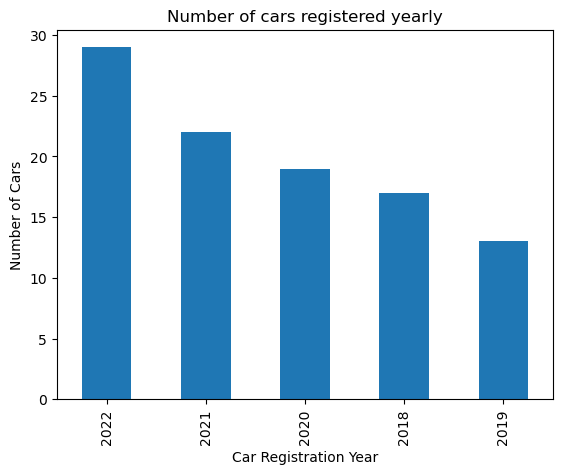

In [14]:
#Q2
df['Reg Year'].value_counts().plot.bar()
plt.xlabel('Car Registration Year')
plt.ylabel('Number of Cars')
plt.title('Number of cars registered yearly')

<Axes: xlabel='Price', ylabel='Engine Power'>

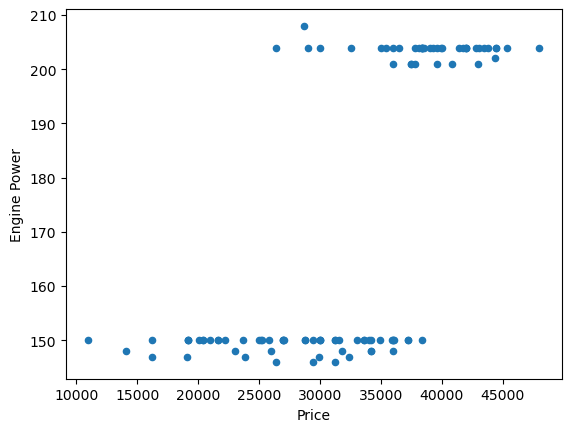

In [15]:
df.plot.scatter(x='Price',y='Engine Power')

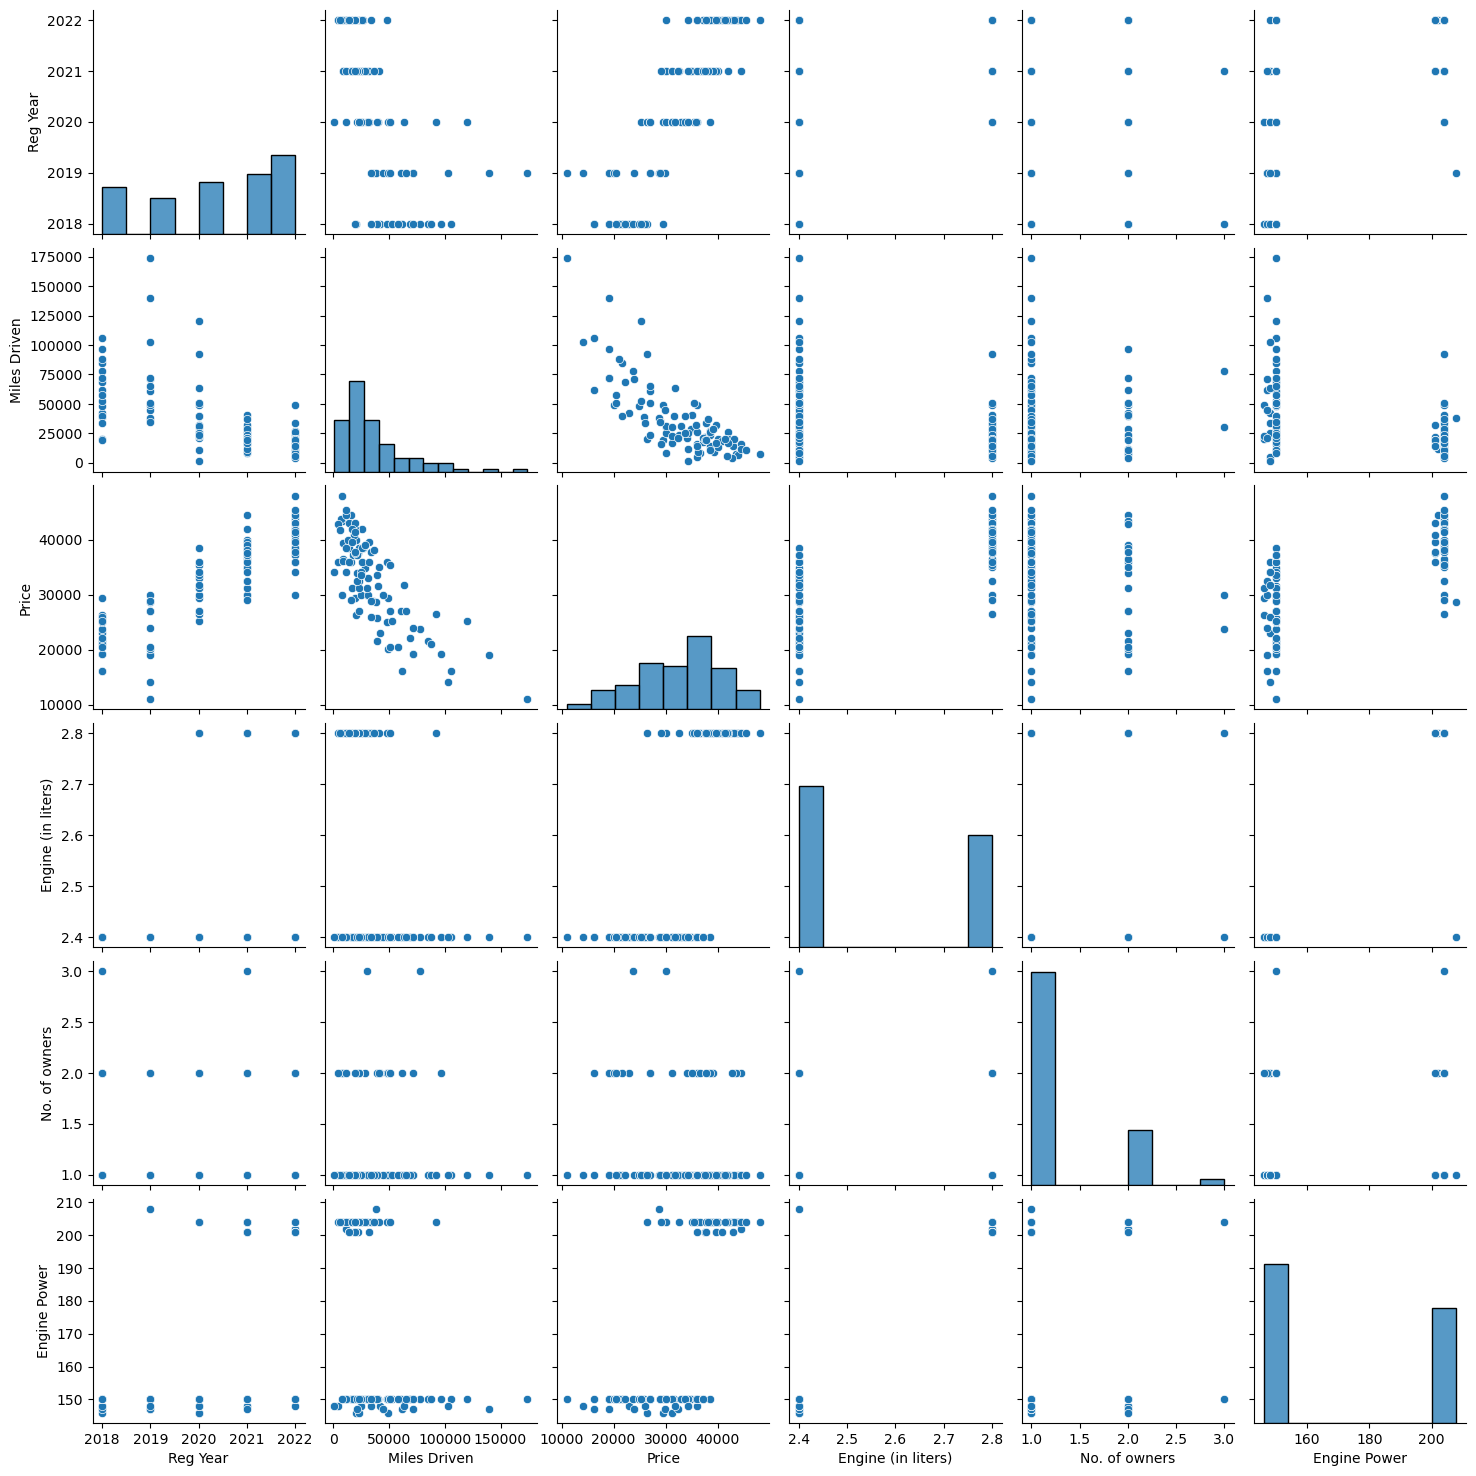

In [16]:
sns.pairplot(df)

Text(0.5, 1.0, 'Tracking Miles Driven based on Registration Year')

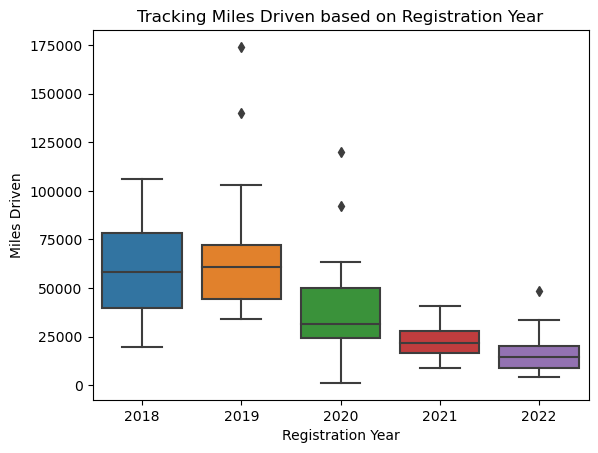

In [17]:
# df.plot.scatter(x='Reg Year',y='Miles Driven')
sns.boxplot(x='Reg Year',y='Miles Driven',data=df)
plt.xlabel('Registration Year')
plt.ylabel('Miles Driven')
plt.title('Tracking Miles Driven based on Registration Year')

Text(0.5, 1.0, 'Relationship between Price and Miles Driven')

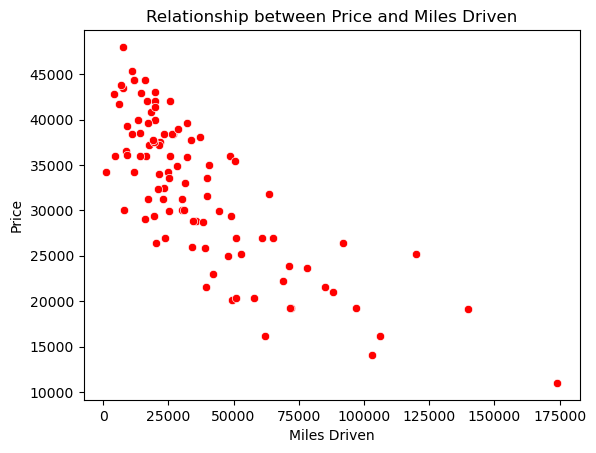

In [18]:
sns.scatterplot(x=df['Miles Driven'],y=df['Price'],data=df,color='red')
plt.xlabel('Miles Driven')
plt.ylabel('Price')
plt.title('Relationship between Price and Miles Driven')

In [19]:
#Q3
numeric_columns = ['Price', 'Miles Driven', 'Engine Power', 'Reg Year']

descriptive_stats = df[numeric_columns].describe().transpose()
# descriptive_stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max']

print(descriptive_stats)

              count      mean           std      min       25%      50%  \
Price         100.0  32393.97   8103.814233  10995.0  26845.50  33802.0   
Miles Driven  100.0  36873.43  30500.627116   1200.0  17171.75  26529.0   
Engine Power  100.0    172.08     26.943892    146.0    150.00    150.0   
Reg Year      100.0   2020.33      1.449869   2018.0   2019.00   2021.0   

                  75%       max  
Price         38400.0   47994.0  
Miles Driven  48775.0  174000.0  
Engine Power    204.0     208.0  
Reg Year       2022.0    2022.0  


In [20]:
#Q3
mileage_bins = [0, 50000, 100000, float('inf')]
mileage_labels = ['0-50k', '50k-100k', '100k+']
df['Mileage Category'] = pd.cut(df['Miles Driven'], bins=mileage_bins, labels=mileage_labels, right=False)

price_stats_by_mileage = df.groupby('Mileage Category')['Price'].describe()

print(price_stats_by_mileage)

                  count          mean          std      min      25%      50%  \
Mileage Category                                                                
0-50k              77.0  35418.454545  6019.540506  20100.0  31194.0  35988.0   
50k-100k           18.0  23703.833333  4838.109673  16188.0  20395.5  22948.0   
100k+               5.0  17101.400000  5402.094390  10995.0  14050.0  16194.0   

                       75%      max  
Mileage Category                     
0-50k             39588.00  47994.0  
50k-100k          26846.25  35394.0  
100k+             19080.00  25188.0  


In [21]:
df['Price'].describe()

count      100.000000
mean     32393.970000
std       8103.814233
min      10995.000000
25%      26845.500000
50%      33802.000000
75%      38400.000000
max      47994.000000
Name: Price, dtype: float64

In [22]:
df['Price'].std()

8103.81423283524

In [23]:
#Q4
mean_x = 32393.97
s = 8103.81
n = 100
confidence_level = 0.95

# Z-score for a 95% confidence interval
z_score = 1.96

# Calculate standard error
standard_error = s / np.sqrt(n)

# Calculate confidence interval
lower_bound = mean_x - z_score * standard_error
upper_bound = mean_x + z_score * standard_error

# Create a DataFrame to display the results
confidence_intervals = pd.DataFrame({
    'Confidence Level': [95],
    'Lower Bound': [lower_bound],
    'Upper Bound': [upper_bound]
})

# Display the result
print(confidence_intervals)

   Confidence Level  Lower Bound  Upper Bound
0                95  30805.62324  33982.31676


In [24]:
#Q5.
import statsmodels.api as sm
import pandas as pd
from scipy.stats import ttest_1samp

# Assuming df is your DataFrame containing the dataset
# Replace column names with the actual column names from your dataset

# Select relevant independent variables
X = df[['Miles Driven', 'Reg Year', 'Engine Power']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Target variable
y = df['Price']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Predict prices using the model
predicted_prices = model.predict(X)

# Add predicted prices to the DataFrame
df['Predicted Price'] = predicted_prices

# Provided average prices for different mileage ranges
provided_averages = {'0-20000': 38016, '20000-40000': 34848, '40000-60000': 29990}

# Perform one-sample t-tests for each group
for mileage_range, average_price in provided_averages.items():
    model_group = df[(df['Miles Driven'] >= int(mileage_range.split('-')[0])) & 
                     (df['Miles Driven'] < int(mileage_range.split('-')[1]))]['Predicted Price']
    
    t_stat, p_value = ttest_1samp(model_group, average_price)
    
    print(f'Hypothesis Test for {mileage_range} Mileage Range:')
    print(f'Test Statistic: {t_stat}')
    print(f'P-value: {p_value}')
    
    # Check the null hypothesis
    if p_value < 0.05:
        print('Reject the null hypothesis: There is a significant difference.')
    else:
        print('Fail to reject the null hypothesis: There is no significant difference.')
    
    print('\n')


Hypothesis Test for 0-20000 Mileage Range:
Test Statistic: 1.648077651354203
P-value: 0.1091224203951802
Fail to reject the null hypothesis: There is no significant difference.


Hypothesis Test for 20000-40000 Mileage Range:
Test Statistic: -1.7856711623028654
P-value: 0.08282014046810421
Fail to reject the null hypothesis: There is no significant difference.


Hypothesis Test for 40000-60000 Mileage Range:
Test Statistic: -1.4552125375475353
P-value: 0.17126680829797705
Fail to reject the null hypothesis: There is no significant difference.




In [25]:
#Q6
columns = ['Price','Miles Driven','Reg Year','Engine Power']

correlation_matrix = df[columns].corr()
print(correlation_matrix)


                 Price  Miles Driven  Reg Year  Engine Power
Price         1.000000     -0.779372  0.849031      0.690152
Miles Driven -0.779372      1.000000 -0.621816     -0.397030
Reg Year      0.849031     -0.621816  1.000000      0.686851
Engine Power  0.690152     -0.397030  0.686851      1.000000


Text(0.5, 1.0, 'Heatmap to show correlation between variables')

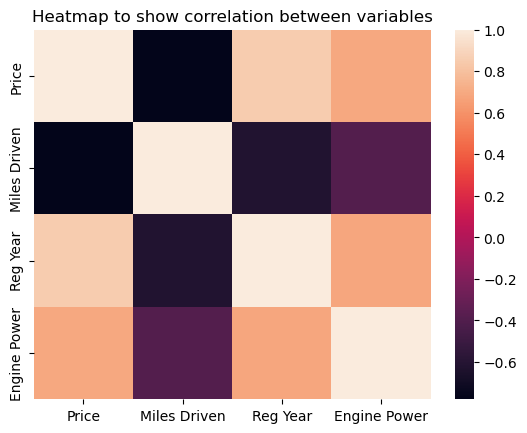

In [26]:
sns.heatmap(correlation_matrix)
plt.title("Heatmap to show correlation between variables")

In [27]:
#Q7
import statsmodels.api as sm

# Assuming df is your DataFrame
# Replace column names with the actual column names from your dataset

X = df[['Miles Driven','Reg Year','Engine Power']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df['Price']

X = sm.add_constant(X)  # Add a constant term to the independent variables

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.52e-39
Time:                        23:42:01   Log-Likelihood:                -946.23
No. Observations:                 100   AIC:                             1900.
Df Residuals:                      96   BIC:                             1911.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.849e+06   7.17e+05     -6.763   

In [28]:
#Q7 Model performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
# Replace column names with the actual column names from your dataset

# Select relevant independent variables
X = df[['Miles Driven','Reg Year','Engine Power']]
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)


Mean Squared Error: 6963463.073054036
       Variable  Coefficient
0  Miles Driven    -0.108383
1      Reg Year  2342.685847
2  Engine Power    80.740754


In [29]:
#ignore
#trying to reduce the mse
from sklearn.model_selection import cross_val_score

# Assuming X and y are your feature matrix and target variable
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)

# Convert scores to positive since sklearn reports negative MSE
mse_cv = -cv_scores.mean()

print(f'Cross-validated MSE: {mse_cv}')


Cross-validated MSE: 10768116.780477285


In [30]:
# Ignore
#overfitting or underfitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE for training and testing sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE on Training Set: {mse_train}')
print(f'MSE on Testing Set: {mse_test}')



MSE on Training Set: 10478349.90854254
MSE on Testing Set: 6963463.073054036


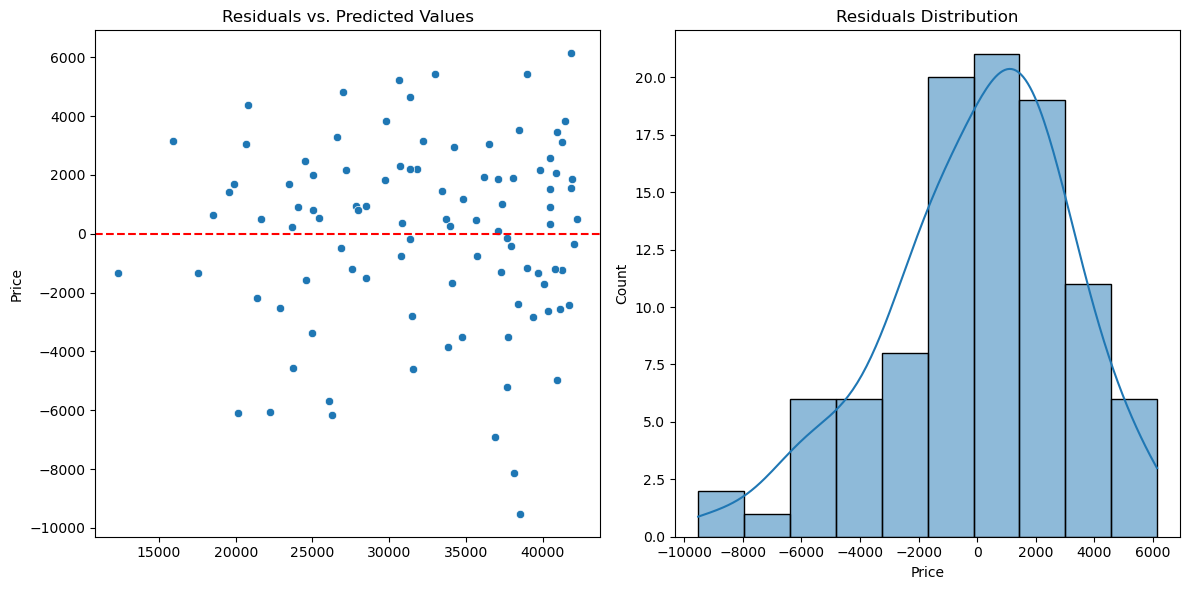

       Variable        VIF
0  Miles Driven   2.933132
1      Reg Year  59.255142
2  Engine Power  50.355967


In [31]:
#Q8
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are your feature matrix and target variable
# Final model: model

# Fit the final model
model.fit(X, y)

# Get predicted values and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Residual plots
plt.figure(figsize=(12, 6))

# Residuals vs. Predicted Values (Homoscedasticity)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')

# Residuals Distribution (Normality of Residuals)
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()

# Other diagnostic plots can be added based on specific needs (e.g., QQ plots)

# Check for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is a DataFrame
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


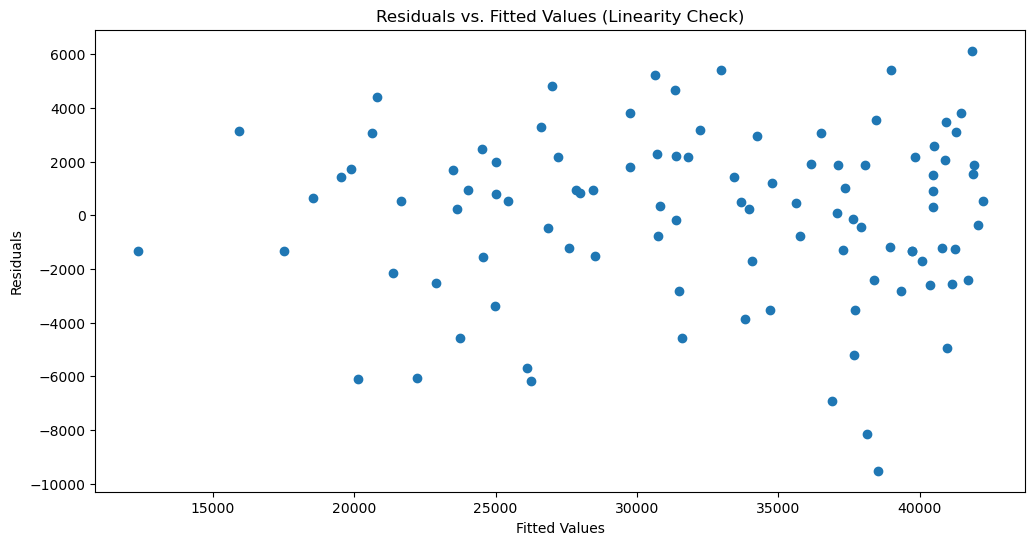

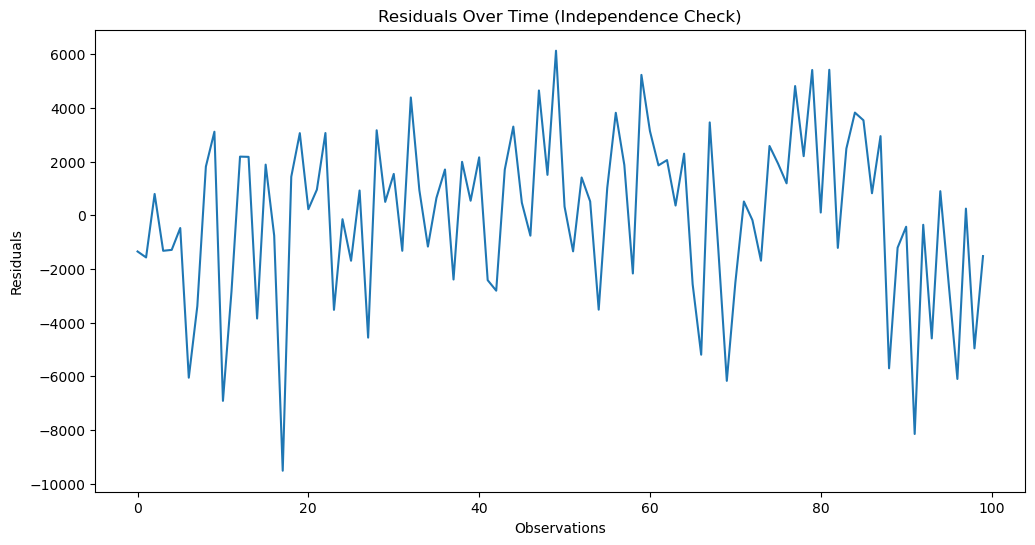

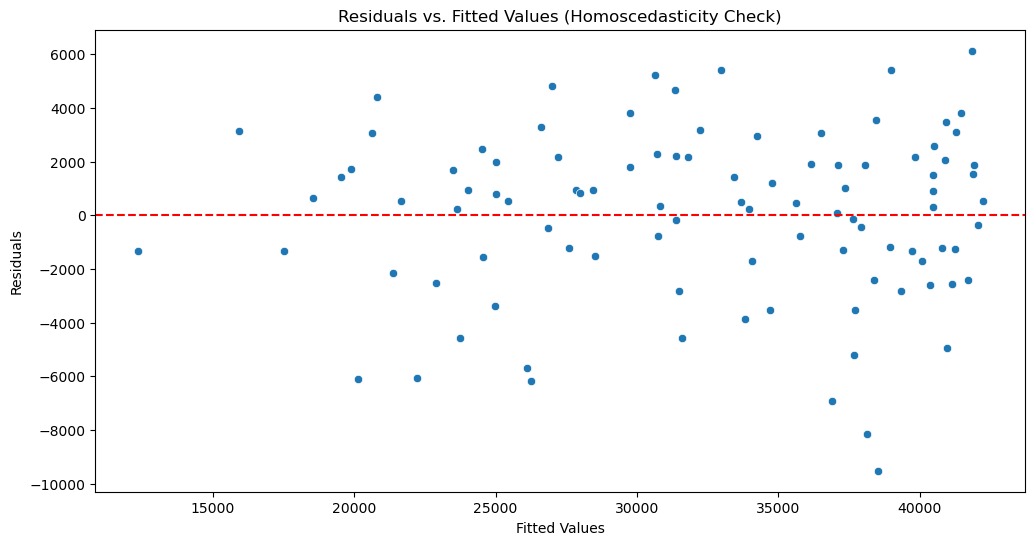

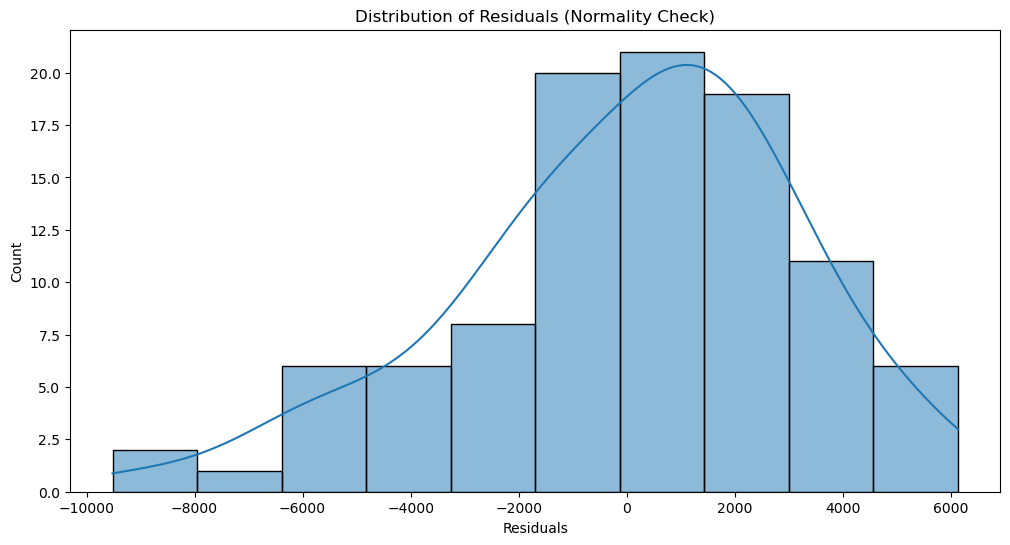

       Variable           VIF
0         const  5.092959e+06
1  Miles Driven  1.634965e+00
2      Reg Year  2.607247e+00
3  Engine Power  1.898391e+00


In [33]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df is your DataFrame
# Replace column names with the actual column names from your dataset

# Select relevant independent variables
X = df[['Miles Driven', 'Reg Year', 'Engine Power']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Target variable
y = df['Price']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Residuals
residuals = model.resid

# Assumption 1: Linearity
# Check if the residuals show a pattern when plotted against predicted values
plt.figure(figsize=(12, 6))
plt.scatter(model.fittedvalues, residuals)
plt.title('Residuals vs. Fitted Values (Linearity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Assumption 2: Independence
# Check if residuals show a pattern over time or across observations
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals Over Time (Independence Check)')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

# Assumption 3: Homoscedasticity
# Check if residuals have constant variance
plt.figure(figsize=(12, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values (Homoscedasticity Check)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Assumption 4: Normality of Residuals
# Check if residuals are approximately normally distributed
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Normality Check)')
plt.xlabel('Residuals')
plt.show()

# Assumption 5: Multicollinearity
# Check for multicollinearity using VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


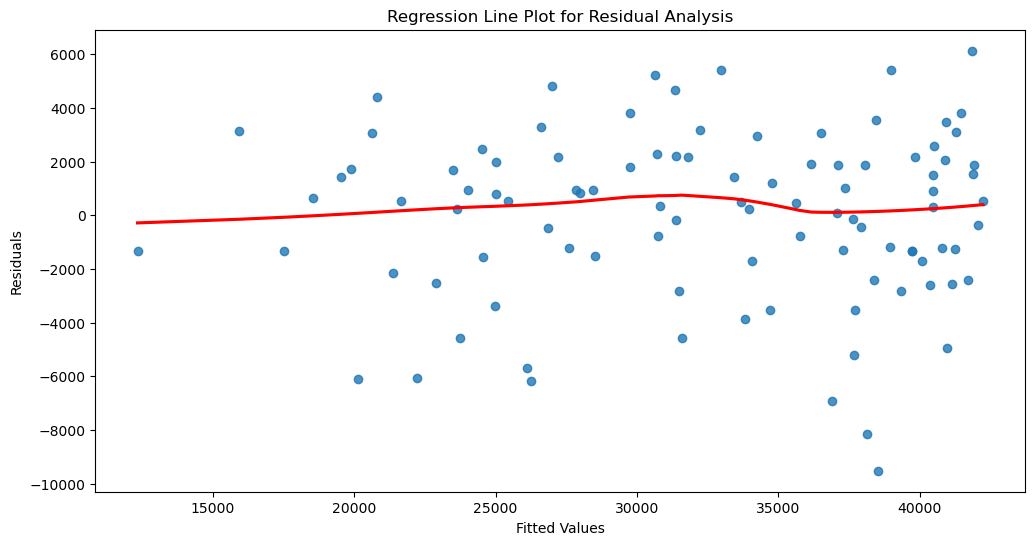

In [34]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# Replace column names with the actual column names from your dataset

# Select relevant independent variables
X = df[['Miles Driven', 'Reg Year', 'Engine Power']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Target variable
y = df['Price']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the residuals
residuals = model.resid

# Create a scatter plot of predicted values against residuals with a regression line
plt.figure(figsize=(12, 6))
sns.regplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Regression Line Plot for Residual Analysis')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


In [38]:
import statsmodels.api as sm
import pandas as pd

# Assuming df is your DataFrame containing the dataset
# Replace column names with the actual column names from your dataset

# Select relevant independent variables
X = df[['Miles Driven', 'Reg Year', 'Engine Power']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Target variable
y = df['Price']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Now, let's use the model for prediction

# Example input data for prediction
new_data = {'Miles Driven': 50000, 'Reg Year': 2016, 'Engine Power': 200}

# Add a constant term to the input features
new_data_with_constant = sm.add_constant(pd.DataFrame([new_data]))

# Make the prediction
predicted_price = model.predict(new_data_with_constant)

print(f'Predicted Price: ${predicted_price.iloc[0]:,.2f}')


ValueError: shapes (1,3) and (4,) not aligned: 3 (dim 1) != 4 (dim 0)

In [41]:
# import statsmodels.api as sm

# # Assuming model is already fitted and X is prepared with the input features
# # Replace column names and values with the actual data

# # Input features for prediction
# new_data = {'Miles Driven': 30000, 'Reg Year': 2019, 'Engine Power': 180}

# # Add a constant term to the input features
# new_data_with_constant = sm.add_constant(pd.DataFrame([new_data]))

# # Make the prediction
# predicted_price = model.predict(new_data_with_constant)

# print(f'Predicted Price: ${predicted_price[0]:,.2f}')

import statsmodels.api as sm

# Assuming df is your DataFrame
# Replace column names with the actual column names from your dataset

# Select relevant independent variables
X = df[['Miles Driven', 'Reg Year', 'Engine Power']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Target variable
y = df['Price']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     182.7
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.52e-39
Time:                        14:28:17   Log-Likelihood:                -946.23
No. Observations:                 100   AIC:                             1900.
Df Residuals:                      96   BIC:                             1911.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.849e+06   7.17e+05     -6.763   